In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('train.csv', usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.dropna(inplace = True)

In [6]:
df.shape

(714, 3)

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [10]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [11]:
clf = DecisionTreeClassifier()

In [15]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [16]:
accuracy_score(y_test,y_pred)

0.6503496503496503

In [17]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv = 10,scoring = 'accuracy'))

0.6289319248826292

In [36]:
kbin_age = KBinsDiscretizer(n_bins = 15, encode = 'ordinal', strategy = 'quantile')
kbin_fare = KBinsDiscretizer(n_bins = 15, encode = 'ordinal', strategy = 'quantile')

In [37]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [38]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [39]:
trf.named_transformers_['first'].n_bins_

array([15])

In [40]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [41]:
trf.named_transformers_['second'].n_bins_

array([15])

In [42]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [43]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [44]:
output['age_labels'] = pd.cut(x = X_train['Age'],
                              bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x = X_train['Fare'],
                               bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [46]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
472,33.0,9.0,27.7500,10.0,"(32.0, 35.0]","(26.55, 31.275]"
117,29.0,7.0,21.0000,8.0,"(28.0, 30.0]","(18.75, 26.0]"
146,27.0,6.0,7.7958,2.0,"(25.0, 28.0]","(7.775, 7.896]"
118,24.0,5.0,247.5208,14.0,"(23.0, 25.0]","(108.9, 512.329]"
336,29.0,7.0,66.6000,12.0,"(28.0, 30.0]","(51.479, 76.292]"


In [47]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [48]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [49]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv = 10, scoring = 'accuracy'))

0.6331181533646322

In [57]:
def discretize(bins,strategy):
    
    kbin_age = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    kbin_fare = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv = 10,scoring = 'accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before (Age)')

    plt.subplot(122)
    plt.hist(X_trf[:,0], color = 'red')
    plt.title('After (Age)')

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before (Fare)')

    plt.subplot(122)
    plt.hist(X_trf[:,1], color = 'red')
    plt.title('After (Fare)')

    plt.show()

0.6247261345852895


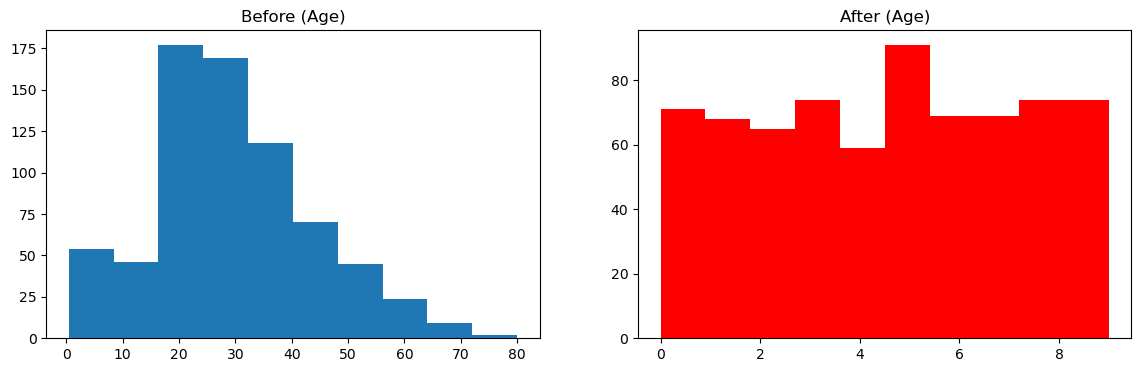

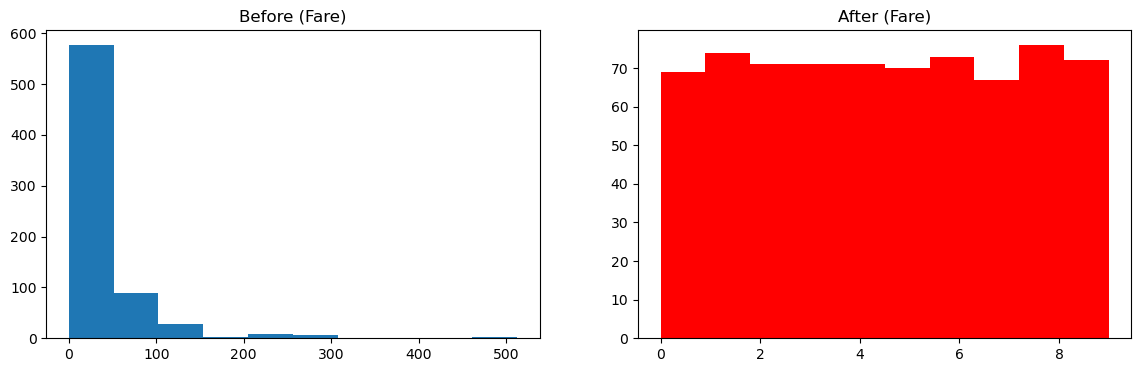

In [58]:
discretize(10,'quantile')

0.6344874804381846


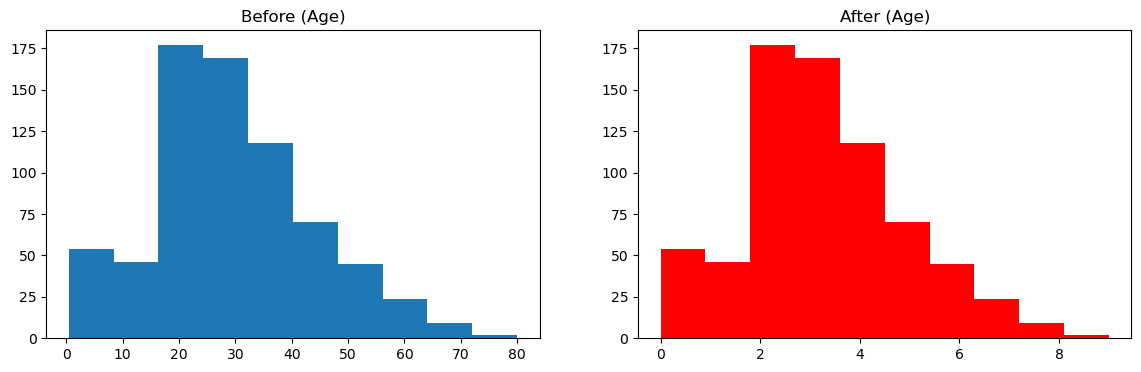

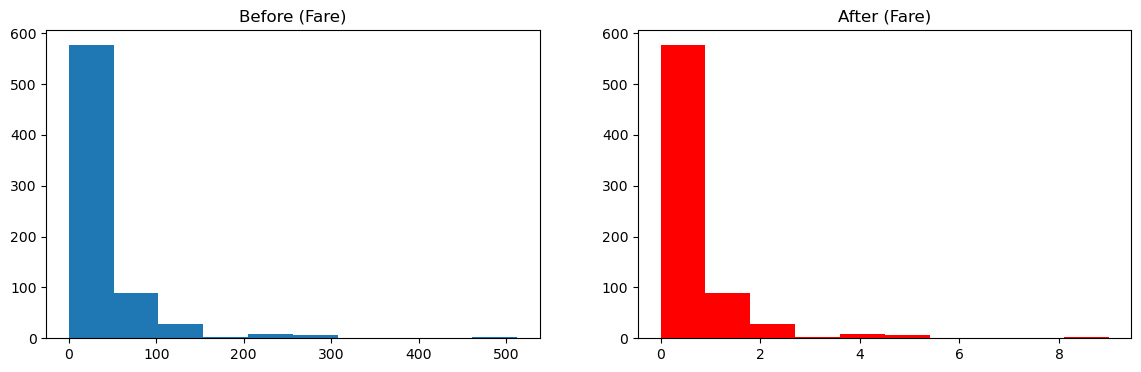

In [59]:
discretize(10,'uniform')

C:\Users\msi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\msi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6331181533646322


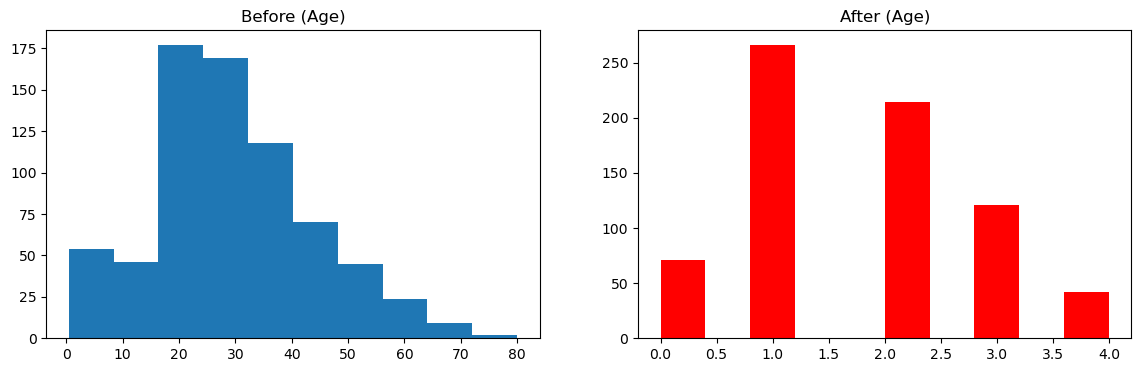

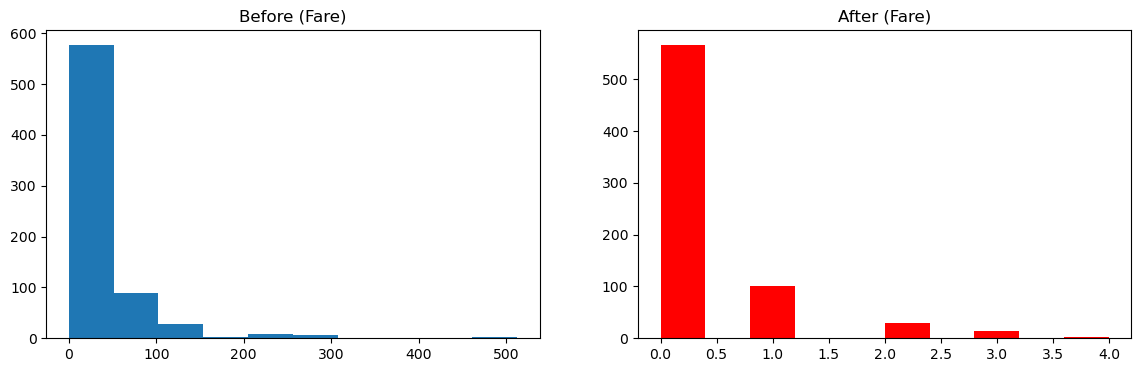

In [60]:
discretize(5,'kmeans')